## Import

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import pyarabic.araby as ar
import unicodedata as ud
import pickle

## Load raw data

In [97]:
work_df = pd.read_csv('./data/Fetched_data.csv')

In [98]:
work_df = work_df.drop('Unnamed: 0',axis=1)

In [99]:
work_df

,id,text,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ
...,...,...,...
458192,1019484980282580992,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,BH
458193,1021083283709407232,@Zzainabali @P_ameerah والله ماينده ابش يختي,BH
458194,1017477537889431552,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,BH
458195,1022430374696239232,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,BH


In [100]:
work_df[6000:7000]

,id,text,dialect
6000,1136823627142352768,#عشاني_احبك_بقول\n\n💕\nلو تسأل عيوني حدود التم...,IQ
6001,1138172857115185152,طيّب واليضوگ سوالفي ما يخون ،\nعلى اهل الشوگ ن...,IQ
6002,1142196614175633408,سَفَر للجنة بعيونـك\nتضحك والورد يغتاض من لونـ...,IQ
6003,1142199437164503040,مدري شنهي بروحي يسكت من اعوفك\nلا تهدني صغير و...,IQ
6004,1142204646297165824,كمت آشوفك وآنتَ مآكو \nوالمس طيوفك سرآب !\nوكآ...,IQ
...,...,...,...
6995,738075455580995584,اكيد الايام دواره والي مايدري اليوم يجيه يوم ي...,IQ
6996,747071031232323584,@sonik75439 @Death_To_iran اقولك أترك ايران وت...,IQ
6997,747808662555602944,@sonik75439 @Death_To_iran اقول الظاهر عايش بك...,IQ
6998,757645235300274176,هذا هو مذهبهم رياء ونفاق https://t.co/LvfGfNG3GN,IQ


## Cleaning function to clean arabic text from non arabic chars or punc or special sympols 

In [105]:
def cleaner(self, text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r' ',text)
    text = re.sub("\d+", " ", text)
    text = re.sub("[a-zA-Z]", " ", text)
    text = re.sub('\u0621', '\u0627', text)
    text = re.sub('\u0649', '\u064a', text)
    text = re.sub('\u0629', '\u0647', text)
    text = re.sub('\u06af', '\u0643', text)
    text = re.sub('\u0686', '\u062c', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub(r'\n', ' ', text)
    text = ar.strip_tashkeel(text)
    text = ar.strip_tatweel(text)
    text = ar.normalize_hamza(text)
    text = ar.strip_diacritics(text)
    text = re.sub(r'(.)\1+', r'\1\1', text)  # keep 2 repeat
    text =  ''.join([c if not ud.category(c).startswith('P') else ' ' for c in text])
    text = re.sub(r' +', ' ' , text)
    return text


In [106]:
work_df['text'] = work_df['text'].apply(lambda x:cleaner(x))

## Plot dialects count

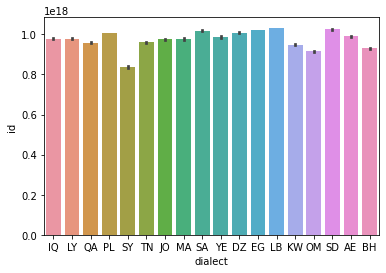

In [26]:
sns.barplot(x='dialect',y='id',data=work_df)
plt.show()

In [107]:
work_df[6000:7000]

,id,text,dialect
6000,1136823627142352768,عشاني احبك بقول لو تسال عيوني حدود التمني قال...,IQ
6001,1138172857115185152,طيب واليضوك سوالفي ما يخون علي اهل الشوك نسمه ...,IQ
6002,1142196614175633408,سفر للجنه بعيونك تضحك والورد يغتاض من لونك,IQ
6003,1142199437164503040,مدري شنهي بروحي يسكت من اعوفك لا تهدني صغير وا...,IQ
6004,1142204646297165824,كمت اشوفك وانت ماكو والمس طيوفك سراب وكامو يكو...,IQ
...,...,...,...
6995,738075455580995584,اكيد الايام دواره والي مايدري اليوم يجيه يوم ي...,IQ
6996,747071031232323584,اقولك اترك ايران وتكلم عن بلادك الي فيها الدع...,IQ
6997,747808662555602944,اقول الظاهر عايش بكوكب ثاني يحمار اقل شي روح ...,IQ
6998,757645235300274176,هذا هو مذهبهم رياا ونفاق,IQ


## Save preprocessed data

In [110]:
work_df.to_csv('./data/Preprocessed_data.csv') 